<a href="https://colab.research.google.com/github/Ouss77/IA_FinalProj/blob/main/SentimentAnals_FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import re
from nltk.stem.porter import *
import matplotlib.pyplot as plt
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import string
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data Preprocessing

In [62]:
data = pd.read_csv('apple-twitter-sentiment-texts.csv')
data.head(5)

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


In [63]:
data['tidy_tweet'] = data['text'].str.replace("@\S+|https?:\S+|http?:\S|[^a-zA-Z]+", " ")
data.head()

,text,sentiment,tidy_tweet
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,Wow Yall needa step it up Apple RT heynyla Mus...
1,What Happened To Apple Inc? http://t.co/FJEX...,0,What Happened To Apple Inc aapl apple MoneyP...
2,Thank u @apple I can now compile all of the pi...,1,Thank u apple I can now compile all of the pic...
3,The oddly uplifting story of the Apple co-foun...,0,The oddly uplifting story of the Apple co foun...
4,@apple can i exchange my iphone for a differen...,0,can i exchange my iphone for a different col...


In [64]:
#Naming the category numbers
lab_to_sentiment = { 1:"Positive", -1:"Negative", 0:"Neutral"}
def label_decoder(label):
  return lab_to_sentiment[label]
data.sentiment = data.sentiment.apply(lambda x: label_decoder(x))
data.head()

,text,sentiment,tidy_tweet
0,Wow. Yall needa step it up @Apple RT @heynyla:...,Negative,Wow Yall needa step it up Apple RT heynyla Mus...
1,What Happened To Apple Inc? http://t.co/FJEX...,Neutral,What Happened To Apple Inc aapl apple MoneyP...
2,Thank u @apple I can now compile all of the pi...,Positive,Thank u apple I can now compile all of the pic...
3,The oddly uplifting story of the Apple co-foun...,Neutral,The oddly uplifting story of the Apple co foun...
4,@apple can i exchange my iphone for a differen...,Neutral,can i exchange my iphone for a different col...


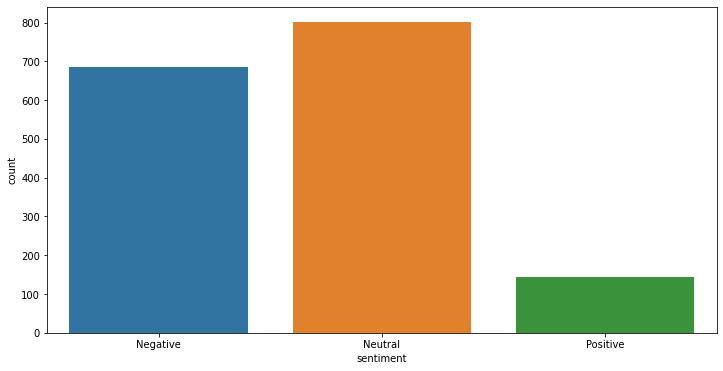

In [65]:
#Ploting the category features
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=data)

In [66]:
temp = data.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,Neutral,801
0,Negative,686
2,Positive,143


In [67]:
#checking the null values
print(data.isnull().sum())

text          0
sentiment     0
tidy_tweet    0
dtype: int64


**Tweets Preprocessing and Cleaning**


In [68]:
#Stemmer
stop_words = stopwords.words('english')
stemmer = PorterStemmer()
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^a-zA-Z]+" 
#text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [69]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [70]:
data['tidy_tweet'] = data['text'].apply(lambda x: preprocess(x))

In [71]:
#Removing short words
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()

,text,sentiment,tidy_tweet
0,Wow. Yall needa step it up @Apple RT @heynyla:...,Negative,yall needa step apple heynyla music snapchat d...
1,What Happened To Apple Inc? http://t.co/FJEX...,Neutral,happened apple aapl apple moneypress
2,Thank u @apple I can now compile all of the pi...,Positive,thank apple compile pics communicate place
3,The oddly uplifting story of the Apple co-foun...,Neutral,oddly uplifting story apple founder sold stake...
4,@apple can i exchange my iphone for a differen...,Neutral,exchange iphone different color lmao changed mind


In [72]:
data['tidy_tweet2'] = data['tidy_tweet'].apply(lambda x: x.split())
data.head()

,text,sentiment,tidy_tweet,tidy_tweet2
0,Wow. Yall needa step it up @Apple RT @heynyla:...,Negative,yall needa step apple heynyla music snapchat d...,"[yall, needa, step, apple, heynyla, music, sna..."
1,What Happened To Apple Inc? http://t.co/FJEX...,Neutral,happened apple aapl apple moneypress,"[happened, apple, aapl, apple, moneypress]"
2,Thank u @apple I can now compile all of the pi...,Positive,thank apple compile pics communicate place,"[thank, apple, compile, pics, communicate, place]"
3,The oddly uplifting story of the Apple co-foun...,Neutral,oddly uplifting story apple founder sold stake...,"[oddly, uplifting, story, apple, founder, sold..."
4,@apple can i exchange my iphone for a differen...,Neutral,exchange iphone different color lmao changed mind,"[exchange, iphone, different, color, lmao, cha..."


In [73]:
data = data[['text', 'tidy_tweet', 'sentiment']]
data.head(10)  

,text,tidy_tweet,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,yall needa step apple heynyla music snapchat d...,Negative
1,What Happened To Apple Inc? http://t.co/FJEX...,happened apple aapl apple moneypress,Neutral
2,Thank u @apple I can now compile all of the pi...,thank apple compile pics communicate place,Positive
3,The oddly uplifting story of the Apple co-foun...,oddly uplifting story apple founder sold stake...,Neutral
4,@apple can i exchange my iphone for a differen...,exchange iphone different color lmao changed mind,Neutral
5,RT @JPDesloges: Apple Acted Unfairly In Suppre...,jpdesloges apple acted unfairly suppressing di...,Negative
6,Let's not forget that press effects stock @App...,forget press effects stock apple defend ipod a...,Neutral
7,Apple Inc. Deleted Songs From Rival Services F...,apple deleted songs rival services ipods aapl,Negative
8,@TeamCavuto @Apple They're staging a die in ar...,apple staging apple store iphone,Neutral
9,Happy Monday! My camera on my fancy @Apple #iP...,happy monday camera fancy apple iphone plus su...,Negative


In [74]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
data['tidy_tweet']=data['tidy_tweet'].apply(simple_stemmer)
data.head()

,text,tidy_tweet,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,yall needa step appl heynyla music snapchat da...,Negative
1,What Happened To Apple Inc? http://t.co/FJEX...,happen appl aapl appl moneypress,Neutral
2,Thank u @apple I can now compile all of the pi...,thank appl compil pic commun place,Positive
3,The oddly uplifting story of the Apple co-foun...,oddli uplift stori appl founder sold stake aap...,Neutral
4,@apple can i exchange my iphone for a differen...,exchang iphon differ color lmao chang mind,Neutral


In [75]:
  >>> import nltk
  >>> nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [76]:
#Lemmatizing the text
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
data["review2"] = data["tidy_tweet"].apply(lambda text: lemmatize_words(text))

In [77]:
#Most reapeted words
from collections import Counter
cnt = Counter()
for text in data["tidy_tweet"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('appl', 1544),
 ('aapl', 528),
 ('iphon', 291),
 ('fuck', 136),
 ('phone', 124),
 ('make', 74),
 ('thank', 68),
 ('store', 67),
 ('shit', 67),
 ('need', 63)]

In [78]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(3)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

data["tidy_tweet2"] = data["tidy_tweet"].apply(lambda text: remove_freqwords(text))
data.head()

,text,tidy_tweet,sentiment,review2,tidy_tweet2
0,Wow. Yall needa step it up @Apple RT @heynyla:...,yall needa step appl heynyla music snapchat da...,Negative,yall needa step appl heynyla music snapchat da...,yall needa step heynyla music snapchat damn ti...
1,What Happened To Apple Inc? http://t.co/FJEX...,happen appl aapl appl moneypress,Neutral,happen appl aapl appl moneypress,happen moneypress
2,Thank u @apple I can now compile all of the pi...,thank appl compil pic commun place,Positive,thank appl compil pic commun place,thank compil pic commun place
3,The oddly uplifting story of the Apple co-foun...,oddli uplift stori appl founder sold stake aap...,Neutral,oddli uplift stori appl founder sold stake aap...,oddli uplift stori founder sold stake
4,@apple can i exchange my iphone for a differen...,exchang iphon differ color lmao chang mind,Neutral,exchang iphon differ color lmao chang mind,exchang differ color lmao chang mind


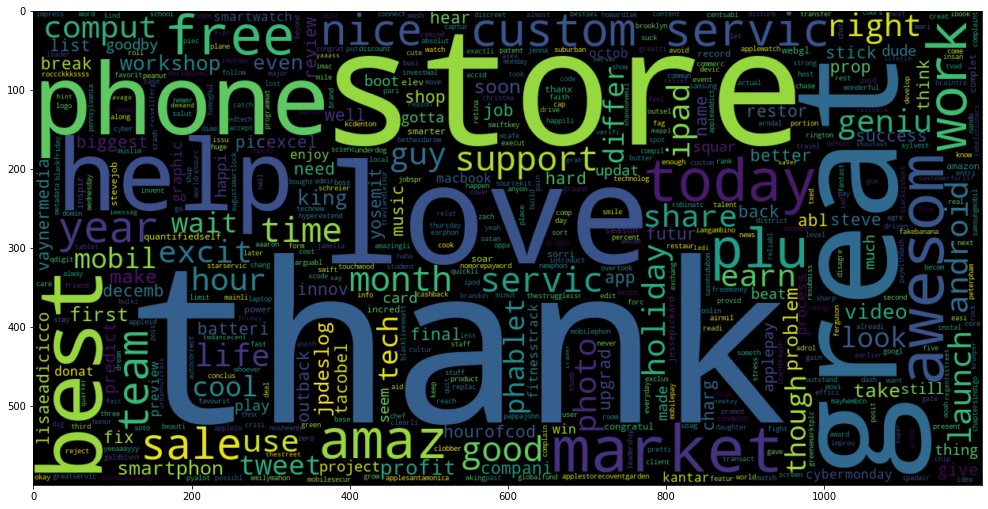

In [79]:
from wordcloud import WordCloud
plt.figure(figsize = (17,12)) 
wc = WordCloud(max_words = 2000 , width = 1200 , height = 600).generate(" ".join(data[data.sentiment == 'Positive'].tidy_tweet2))
plt.imshow(wc , interpolation = 'bilinear')

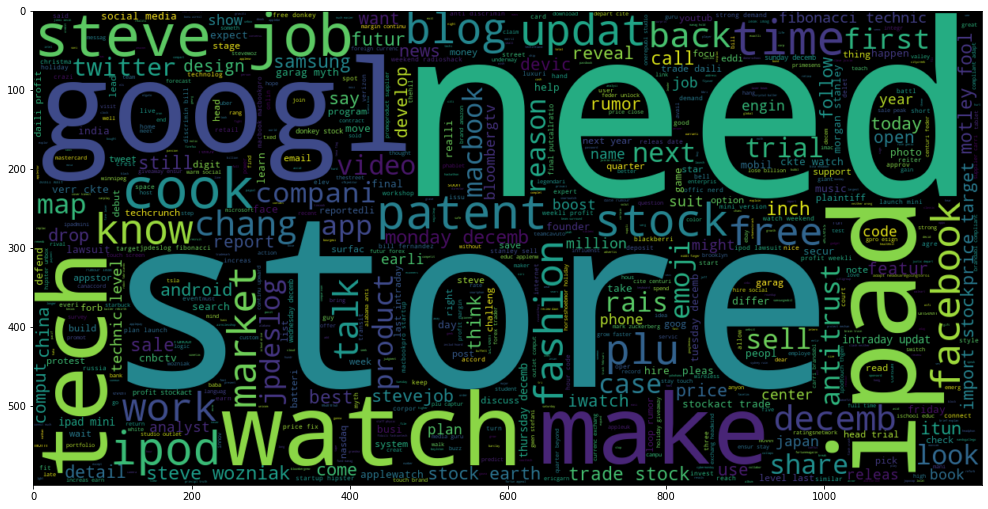

In [80]:
from wordcloud import WordCloud
plt.figure(figsize = (17,12)) 
wc = WordCloud(max_words = 2000 , width = 1200 , height = 600).generate(" ".join(data[data.sentiment == 'Neutral'].tidy_tweet2))
plt.imshow(wc , interpolation = 'bilinear')

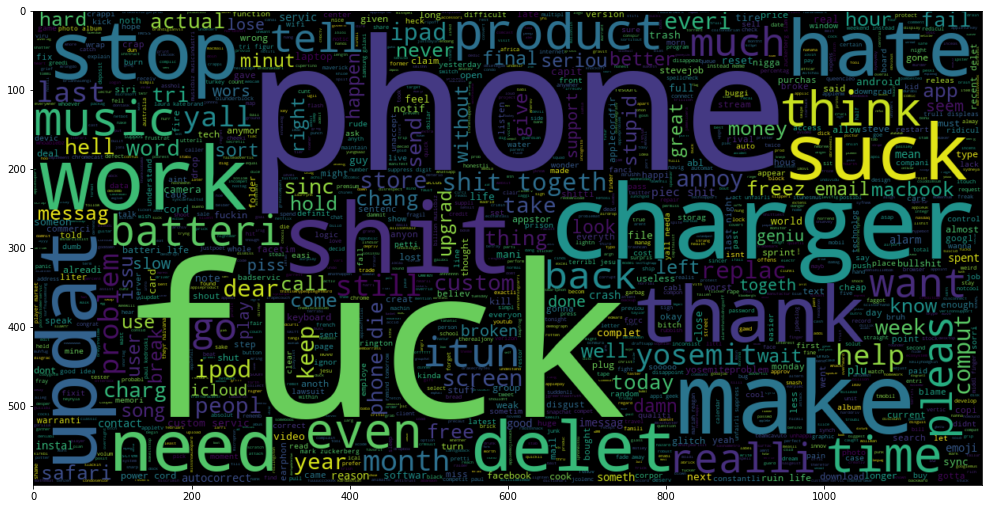

In [81]:
from wordcloud import WordCloud
plt.figure(figsize = (17,12)) 
wc = WordCloud(max_words = 2000 , width = 1200 , height = 600).generate(" ".join(data[data.sentiment == 'Negative'].tidy_tweet2))
plt.imshow(wc , interpolation = 'bilinear')

In [138]:
X = data['tidy_tweet']
y = data['sentiment']

**Creating a Model : Machine Learning**




In [146]:
#Splitting our Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)

In [147]:
# TF-IDF feature matrix
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
#    stop_words='english',
    ngram_range=(1,5),
    max_features=35)
vect = TfidfVectorizer().fit(X_train)
X_train_vec = vect.transform(X_train)
X_val_vec = vect.transform(X_val)
#max_df=0.90, min_df=2, max_features=1000, stop_words='english'

In [85]:
print(X_train_vec)

  (0, 2540)	0.31502321371445563
  (0, 2385)	0.31502321371445563
  (0, 1703)	0.31502321371445563
  (0, 830)	0.2764374446473385
  (0, 784)	0.28583420622127204
  (0, 637)	0.2764374446473385
  (0, 508)	0.28583420622127204
  (0, 345)	0.23017396233737367
  (0, 344)	0.31502321371445563
  (0, 319)	0.31502321371445563
  (0, 108)	0.04953760186268405
  (0, 89)	0.25168525658770957
  (0, 88)	0.262268317351674
  (1, 2459)	0.4719036687115053
  (1, 1724)	0.4491892177650018
  (1, 1483)	0.4370179759998643
  (1, 1310)	0.43157052082237335
  (1, 1193)	0.2206100651937522
  (1, 108)	0.09288178566798123
  (1, 1)	0.3755027580946786
  (2, 2360)	0.38353973671070385
  (2, 1287)	0.49673771068356426
  (2, 805)	0.49673771068356426
  (2, 758)	0.32642100997595713
  (2, 437)	0.49673771068356426
  :	:
  (1298, 1972)	0.5082226953061265
  (1298, 1314)	0.5082226953061265
  (1298, 1190)	0.3013874510486573
  (1298, 981)	0.3289334706260804
  (1298, 1)	0.1615470587154188
  (1299, 2032)	0.4020013393074467
  (1299, 1505)	0.69433

In [150]:
#CountVectorize (Bag-of-words) : Convert a collection of text documents to a matrix of token counts
bow_vectorizer = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 10,
                             min_df = 100,
                             ngram_range = (1,9)
                            )
vect = CountVectorizer().fit(X_train)
X_train_vec = vect.transform(X_train)
X_val_vec = vect.transform(X_val)

In [87]:
#Mulrinominal Naive Bayes Classification
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
#fit_prior=False, alpha=0.907
model.fit(X_train_vec, y_train)
pred = model.predict(X_val_vec)
cf = classification_report(y_val,pred)
print(f"Accuracy Score for test: {accuracy_score(y_val, pred) * 100:.2f}%")
print(cf)
print(f"Confusion Matrix: \n {confusion_matrix(y_val, pred)}\n")

Accuracy Score for test: 82.52%
              precision    recall  f1-score   support

    Negative       0.83      0.88      0.85       153
     Neutral       0.83      0.89      0.86       145
    Positive       0.67      0.21      0.32        28

    accuracy                           0.83       326
   macro avg       0.78      0.66      0.68       326
weighted avg       0.82      0.83      0.81       326

Confusion Matrix: 
 [[134  16   3]
 [ 16 129   0]
 [ 11  11   6]]



In [88]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train_vec, y_train)
pred = model.predict(X_val_vec)
cf = classification_report(y_val,pred)
print(f"Accuracy Score: {accuracy_score(y_val, pred) * 100:.2f}%")
print("the classification report is \n" + cf)
print(f"Confusion Matrix: \n {confusion_matrix(y_val, pred)}\n")

Accuracy Score: 81.60%
the classification report is 
              precision    recall  f1-score   support

    Negative       0.88      0.78      0.82       153
     Neutral       0.77      0.92      0.84       145
    Positive       0.76      0.46      0.58        28

    accuracy                           0.82       326
   macro avg       0.80      0.72      0.75       326
weighted avg       0.82      0.82      0.81       326

Confusion Matrix: 
 [[119  31   3]
 [ 10 134   1]
 [  7   8  13]]



In [152]:
#Decision Tree
model = DecisionTreeClassifier(random_state=5)
model.fit(X_train_vec, y_train)
pred = model.predict(X_val_vec)
cf = classification_report(y_val,pred)
print(f"Accuracy Score: {accuracy_score(y_val, pred) * 100:.2f}%")
print("the classification report is \n" + cf)
print(f"Confusion Matrix: \n {confusion_matrix(y_val, pred)}\n")

Accuracy Score: 76.69%
the classification report is 
              precision    recall  f1-score   support

    Negative       0.87      0.71      0.78       153
     Neutral       0.74      0.87      0.80       145
    Positive       0.50      0.54      0.52        28

    accuracy                           0.77       326
   macro avg       0.70      0.71      0.70       326
weighted avg       0.78      0.77      0.77       326

Confusion Matrix: 
 [[109  36   8]
 [ 12 126   7]
 [  5   8  15]]



In [90]:
#SVM
model = SVC()
model.fit(X_train_vec, y_train)
pred = model.predict(X_val_vec)
cf = classification_report(y_val,pred)
print(f"Accuracy Score: {accuracy_score(y_val, pred) * 100:.2f}%")
print("the classification report is \n" + cf)
print(f"Confusion Matrix: \n {confusion_matrix(y_val, pred)}\n")

Accuracy Score: 81.29%
the classification report is 
              precision    recall  f1-score   support

    Negative       0.91      0.77      0.84       153
     Neutral       0.74      0.97      0.84       145
    Positive       0.88      0.25      0.39        28

    accuracy                           0.81       326
   macro avg       0.84      0.66      0.69       326
weighted avg       0.83      0.81      0.80       326

Confusion Matrix: 
 [[118  34   1]
 [  5 140   0]
 [  6  15   7]]



In [91]:
#Random Forest
model = RandomForestClassifier(random_state=2)
model.fit(X_train_vec, y_train)
pred = model.predict(X_val_vec)
cf = classification_report(y_val,pred)
print(f"Accuracy Score: {accuracy_score(y_val, pred) * 100:.2f}%")
print("the classification report is \n" + cf)
print(f"Confusion Matrix: \n {confusion_matrix(y_val, pred)}\n")

Accuracy Score: 80.37%
the classification report is 
              precision    recall  f1-score   support

    Negative       0.91      0.71      0.80       153
     Neutral       0.74      0.96      0.83       145
    Positive       0.82      0.50      0.62        28

    accuracy                           0.80       326
   macro avg       0.82      0.72      0.75       326
weighted avg       0.82      0.80      0.80       326

Confusion Matrix: 
 [[109  41   3]
 [  6 139   0]
 [  5   9  14]]



Second Experiment

In [153]:
#Second Split of our Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=101)

In [154]:
# TF-IDF feature matrix

vect = TfidfVectorizer().fit(X_train)
X_train_vec = vect.transform(X_train)
X_val_vec = vect.transform(X_val)
#max_df=0.90, min_df=2, max_features=1000, stop_words='english'

In [103]:
#Hyperparamet tuning Mulrinominal Naive Bayes Classification
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(fit_prior=False, alpha=0.907)
#fit_prior=False, alpha=0.907
model.fit(X_train_vec, y_train)
pred = model.predict(X_val_vec)
cf = classification_report(y_val,pred)
print(f"Accuracy Score for test: {accuracy_score(y_val, pred) * 100:.2f}%")
print(cf)
print(f"Confusion Matrix: \n {confusion_matrix(y_val, pred)}\n")

Accuracy Score for test: 84.05%
              precision    recall  f1-score   support

    Negative       0.85      0.87      0.86        69
     Neutral       0.89      0.90      0.89        79
    Positive       0.50      0.40      0.44        15

    accuracy                           0.84       163
   macro avg       0.74      0.72      0.73       163
weighted avg       0.83      0.84      0.84       163

Confusion Matrix: 
 [[60  5  4]
 [ 6 71  2]
 [ 5  4  6]]



In [95]:
# Hyperparemeter tunning Logistic Regression 
from sklearn.model_selection import RepeatedStratifiedKFold
params = {"C": [100, 10, 1.0, 0.1, 0.01, 0.05],
          "solver": ['liblinear'],
          "penalty": ['none', 'l1', 'l2', 'elasticnet'],
          }
model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
GS = GridSearchCV(model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=cv, iid=True)
GS.fit(X_train_vec, y_train)
best_params = GS.best_params_
print(f"Best parameters: {best_params}")
model_tun = LogisticRegression(**best_params)
model_tun.fit(X_train_vec, y_train)
pred = model_tun.predict(X_val_vec)
cf = classification_report(y_val,pred)
print(f"Accuracy Score: {accuracy_score(y_val, pred) * 100:.2f}%")
print("the classification report is \n" + cf)
print(f"Confusion Matrix: \n {confusion_matrix(y_val, pred)}\n")

Fitting 50 folds for each of 24 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    9.3s


Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy Score: 85.28%
the classification report is 
              precision    recall  f1-score   support

    Negative       0.89      0.81      0.85        69
     Neutral       0.83      0.95      0.89        79
    Positive       0.80      0.53      0.64        15

    accuracy                           0.85       163
   macro avg       0.84      0.76      0.79       163
weighted avg       0.85      0.85      0.85       163

Confusion Matrix: 
 [[56 11  2]
 [ 4 75  0]
 [ 3  4  8]]



[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.9min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [96]:
#Hyperparemeter tunning SVM
params = {"C":(100, 10, 1.0, 0.1, 0.001), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}
model = SVC()
GS = GridSearchCV(model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
GS.fit(X_train_vec, y_train)
best_params = GS.best_params_
print(f"Best parameters: {best_params}")
model_tun = SVC(**best_params)
model_tun.fit(X_train_vec, y_train)
pred = model_tun.predict(X_val_vec)
cf = classification_report(y_val,pred)
print(f"Accuracy Score: {accuracy_score(y_val, pred) * 100:.2f}%")
print("the classification report is \n" + cf)
print(f"Confusion Matrix: \n {confusion_matrix(y_val, pred)}\n")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 105 candidates, totalling 525 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed:  1.1min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best parameters: {'C': 10, 'gamma': 0.75, 'kernel': 'rbf'}
Accuracy Score: 84.66%
the classification report is 
              precision    recall  f1-score   support

    Negative       0.88      0.81      0.84        69
     Neutral       0.82      0.95      0.88        79
    Positive       0.88      0.47      0.61        15

    accuracy                           0.85       163
   macro avg       0.86      0.74      0.78       163
weighted avg       0.85      0.85      0.84       163

Confusion Matrix: 
 [[56 12  1]
 [ 4 75  0]
 [ 4  4  7]]



In [99]:
##Hyperparemeter tunning Random Forest 
params = [{    'n_estimators': np.arange(10, 100),
               'max_features' : np.arange(1, 20)}]

model = RandomForestClassifier(random_state=19)
GS = GridSearchCV(model, params, scoring='accuracy')

GS.fit(X_train_vec, y_train)
best_params = GS.best_params_
print(f"Best parameters: {best_params}")
model_tun = RandomForestClassifier(**best_params)
model_tun.fit(X_train_vec, y_train)
pred = model_tun.predict(X_val_vec)
cf = classification_report(y_val,pred)
print(f"Accuracy Score: {accuracy_score(y_val, pred) * 100:.2f}%")
print("the classification report is \n" + cf)
print(f"Confusion Matrix: \n {confusion_matrix(y_val, pred)}\n")

Best parameters: {'max_features': 15, 'n_estimators': 10}
Accuracy Score: 82.21%
the classification report is 
              precision    recall  f1-score   support

    Negative       0.85      0.81      0.83        69
     Neutral       0.81      0.92      0.86        79
    Positive       0.71      0.33      0.45        15

    accuracy                           0.82       163
   macro avg       0.79      0.69      0.72       163
weighted avg       0.82      0.82      0.81       163

Confusion Matrix: 
 [[56 11  2]
 [ 6 73  0]
 [ 4  6  5]]



In [ ]:
#Hyperparemeter tunning decision Tree 
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

model = DecisionTreeClassifier(random_state=42)
GS = GridSearchCV(model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
GS.fit(X_train_vec, y_train)
best_params = GS.best_params_
print(f'Best_params: {best_params}')

model_tun = DecisionTreeClassifier(**best_params)
model_tun.fit(X_train_vec, y_train)
pred = model_tun.predict(X_val_vec)
cf = classification_report(y_val,pred)
print(f"Accuracy Score: {accuracy_score(y_val, pred) * 100:.2f}%")
print("the classification report is \n" + cf)
print(f"Confusion Matrix: \n {confusion_matrix(y_val, pred)}\n")

In [173]:
#Decision Tree
model = DecisionTreeClassifier(random_state=5)
model.fit(X_train_vec, y_train)
pred = model.predict(X_val_vec)
cf = classification_report(y_val,pred)
print(f"Accuracy Score: {accuracy_score(y_val, pred) * 100:.2f}%")
print("the classification report is \n" + cf)
print(f"Confusion Matrix: \n {confusion_matrix(y_val, pred)}\n")

Accuracy Score: 76.69%
the classification report is 
              precision    recall  f1-score   support

    Negative       0.88      0.64      0.74        69
     Neutral       0.74      0.92      0.82        79
    Positive       0.57      0.53      0.55        15

    accuracy                           0.77       163
   macro avg       0.73      0.70      0.70       163
weighted avg       0.78      0.77      0.76       163

Confusion Matrix: 
 [[44 19  6]
 [ 6 73  0]
 [ 0  7  8]]

